# PCA Baseline: Python

This Python notebook demonstrates a conventional **PCA** workflow using `scikit-learn`. Through a series of standard steps - data loading, *standardization*, *dimensionality reduction*, and *visualization* - it establishes *expected behaviors* and results for **PCA** analysis. The notebook employs widely-used libraries like `pandas` for data manipulation, `scikit-learn` for **PCA** computation, and `matplotlib` for visualization. This represents the typical approach data scientists take when performing **PCA**, making it an ideal *reference point* for validating our implementation.

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load and prepare the data
iris_data = pd.read_csv("../../data/iris.csv")
X = iris_data.iloc[:, :4]  # Select all rows and first 4 columns
y = iris_data['variety']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Print PCA summary
print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Cumulative variance ratio:", np.cumsum(pca.explained_variance_ratio_))

Explained variance ratio: [0.72962445 0.22850762 0.03668922 0.00517871]
Cumulative variance ratio: [0.72962445 0.95813207 0.99482129 1.        ]


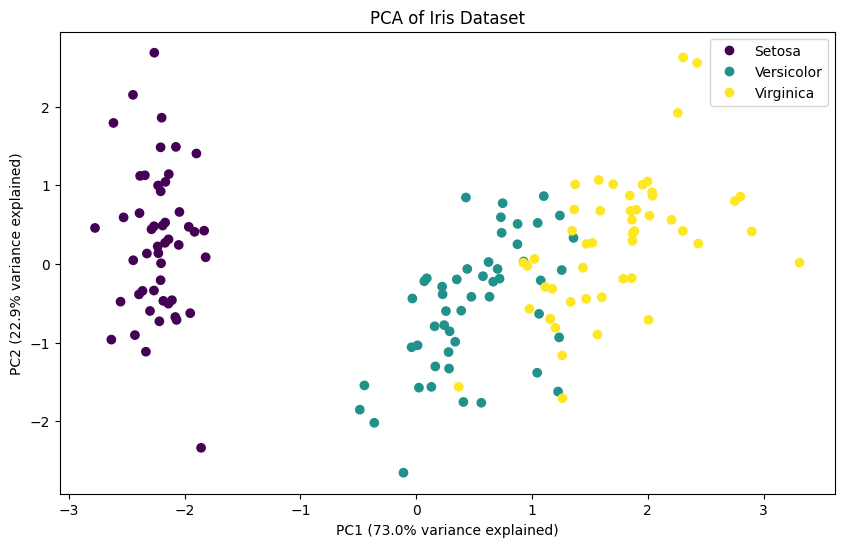

In [3]:
plt.figure(figsize=(10, 6))
categories = pd.Categorical(y).codes
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=categories, cmap='viridis')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%} variance explained)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%} variance explained)')
plt.title('PCA of Iris Dataset')
plt.legend(scatter.legend_elements()[0], y.unique())
plt.show()

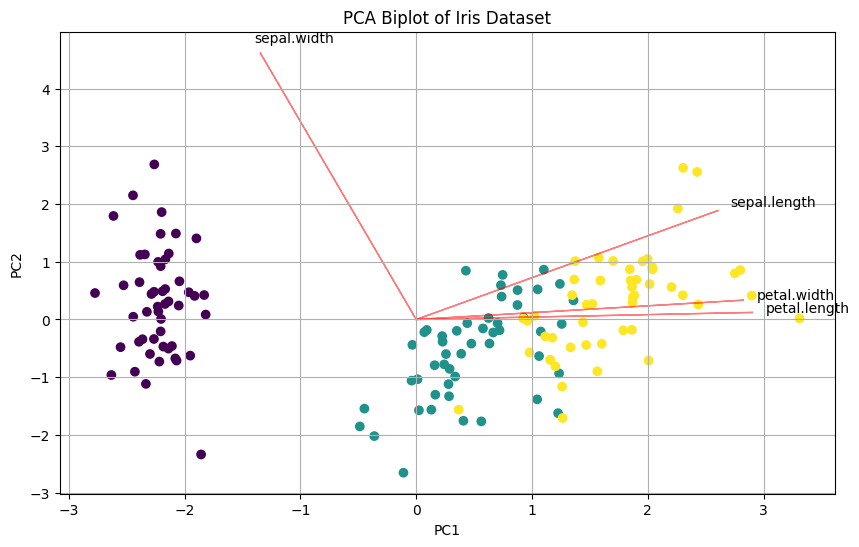

In [4]:
# Create biplot
def biplot(score, coef, labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coef.shape[0]
    plt.figure(figsize=(10, 6))
    plt.scatter(xs, ys, c=pd.Categorical(y).codes, cmap='viridis')
    for i in range(n):
        plt.arrow(0, 0, coef[i,0]*5, coef[i,1]*5, color='r', alpha=0.5)
        if labels is None:
            plt.text(coef[i,0]*5.2, coef[i,1]*5.2, f'Var{i+1}')
        else:
            plt.text(coef[i,0]*5.2, coef[i,1]*5.2, labels[i])
            
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title('PCA Biplot of Iris Dataset')
    plt.grid()

# Create and show biplot
biplot(X_pca, pca.components_.T, X.columns)
plt.show()

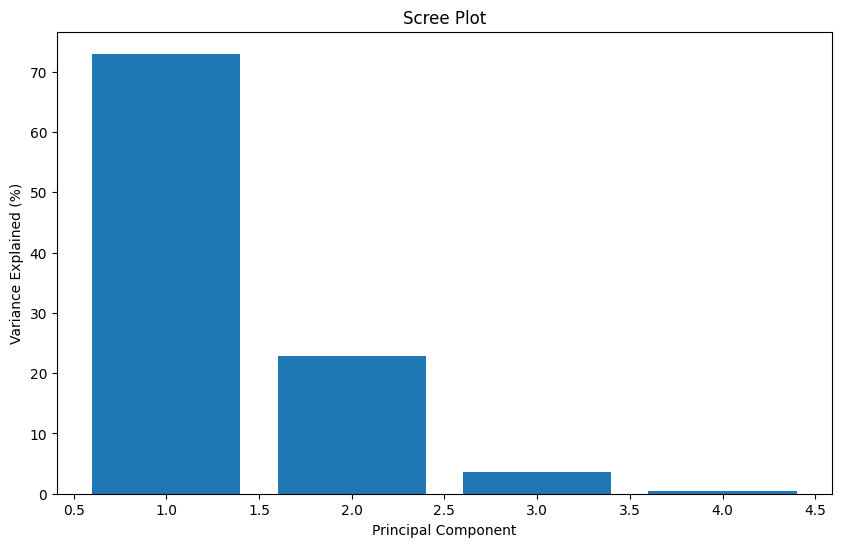

In [5]:
# Create scree plot
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), 
        pca.explained_variance_ratio_ * 100)
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained (%)')
plt.title('Scree Plot')
plt.show()